In [1]:
%load_ext nb_black

<IPython.core.display.Javascript object>

In [2]:
import pandas as pd
import numpy as np
import missingno as msno

import matplotlib.pyplot as plt
import seaborn as sns

<IPython.core.display.Javascript object>

# Reading the datasets

## Reading the global dataset

In [3]:
df = pd.read_csv("../../../../data/interim/Global-Dataset/global_dataset.csv")

<IPython.core.display.Javascript object>

## Reading the local dataset for plant AY

In [4]:
df_i = pd.read_csv("../../../../data/processed/204/ay.csv")

<IPython.core.display.Javascript object>

# Preprocessing of Global Dataset

### Removing the plant to be fine-tuned

In [5]:
df.shape

(66111, 48)

<IPython.core.display.Javascript object>

In [6]:
df = df[df["Factory_Plant"] != "204_AY"].reset_index(drop=True)

<IPython.core.display.Javascript object>

In [7]:
df.shape

(65136, 48)

<IPython.core.display.Javascript object>

### Removing non-matching columns between the datasets

In [8]:
df = df[df_i.columns.to_list() + ["Factory_Plant"]]

<IPython.core.display.Javascript object>

In [9]:
df.shape

(65136, 13)

<IPython.core.display.Javascript object>

## Removing missing features

In [10]:
(df.isna().sum() / df.shape[0] * 100).sort_values(ascending=False).to_frame(
    name="Missing (%)"
).style.background_gradient(cmap="Reds")

,Missing (%)
#325,12.122329
CS3,6.214689
Initial setting time,4.295628
#200,4.203513
Final setting time,1.209776
SO3,0.996377
Loss on Ignition,0.772230
Blaine,0.307050
CS7,0.138172
Date,0.000000


<IPython.core.display.Javascript object>

<Axes: >

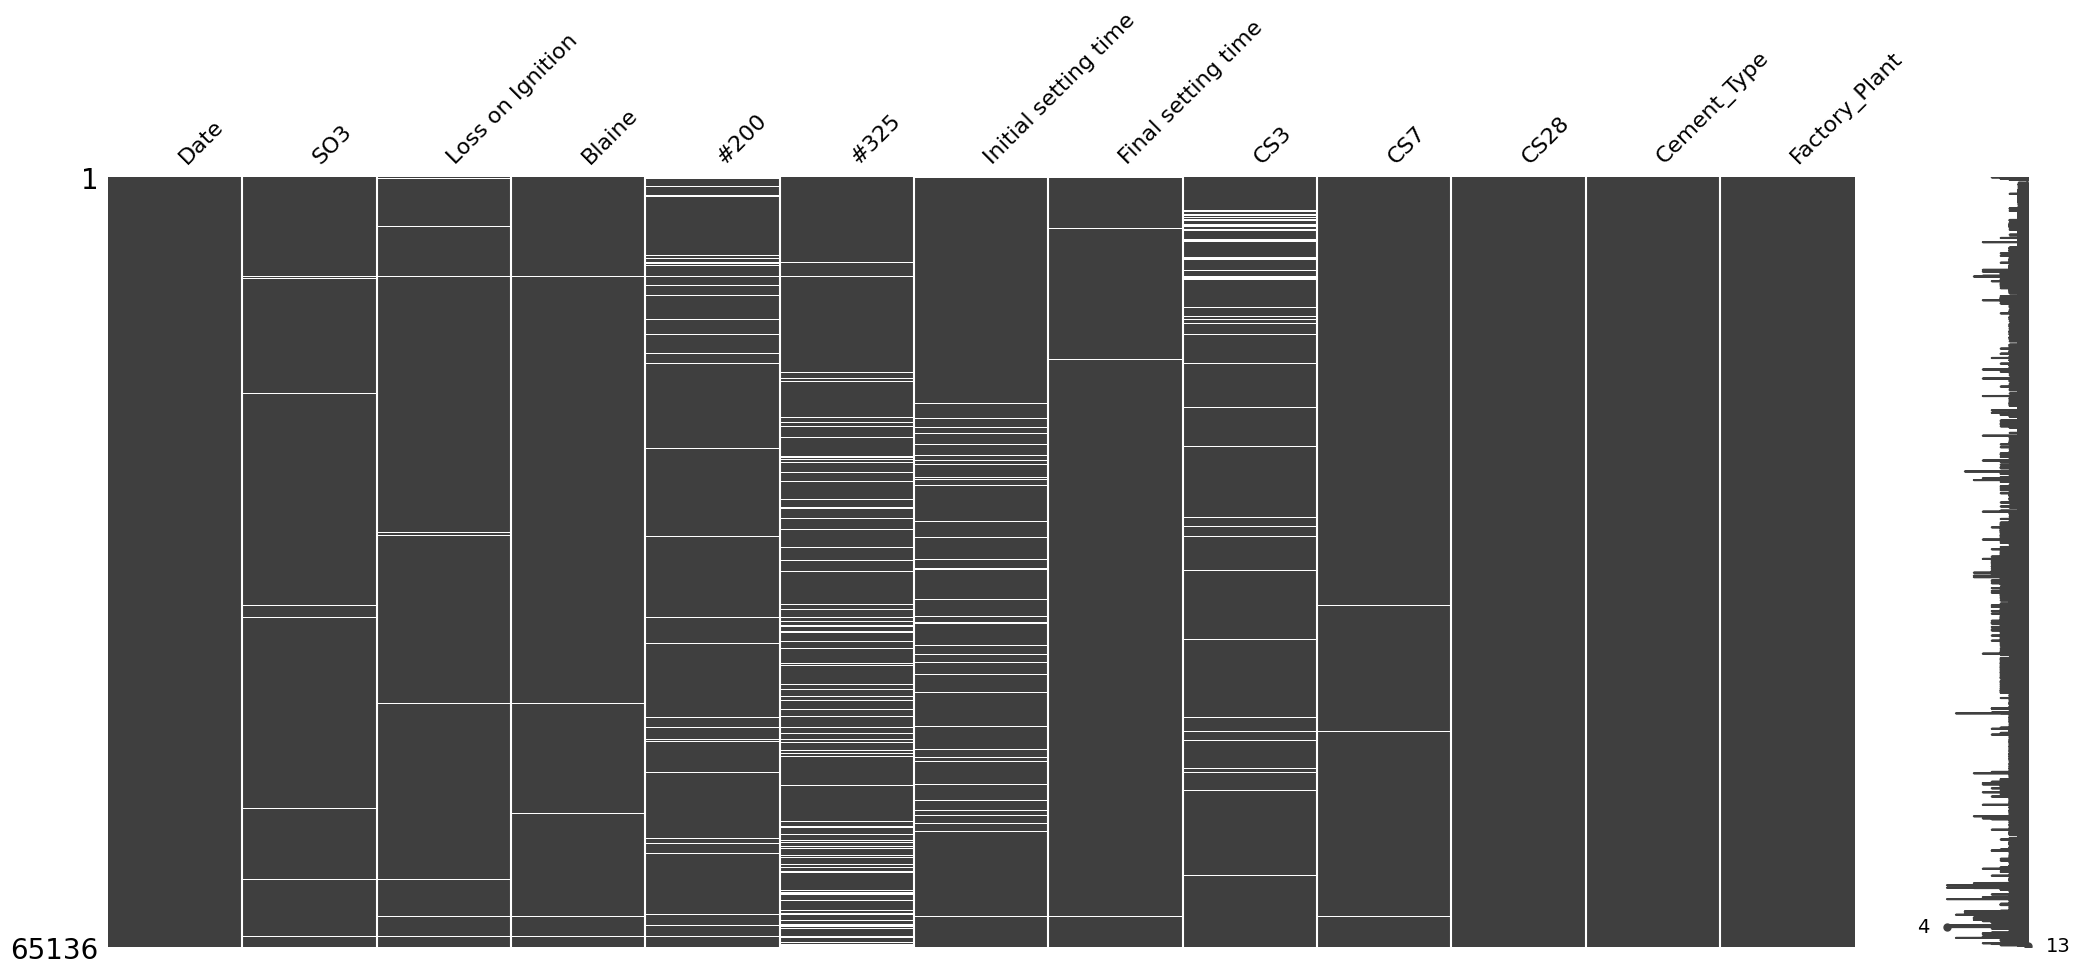

<IPython.core.display.Javascript object>

In [11]:
msno.matrix(df)

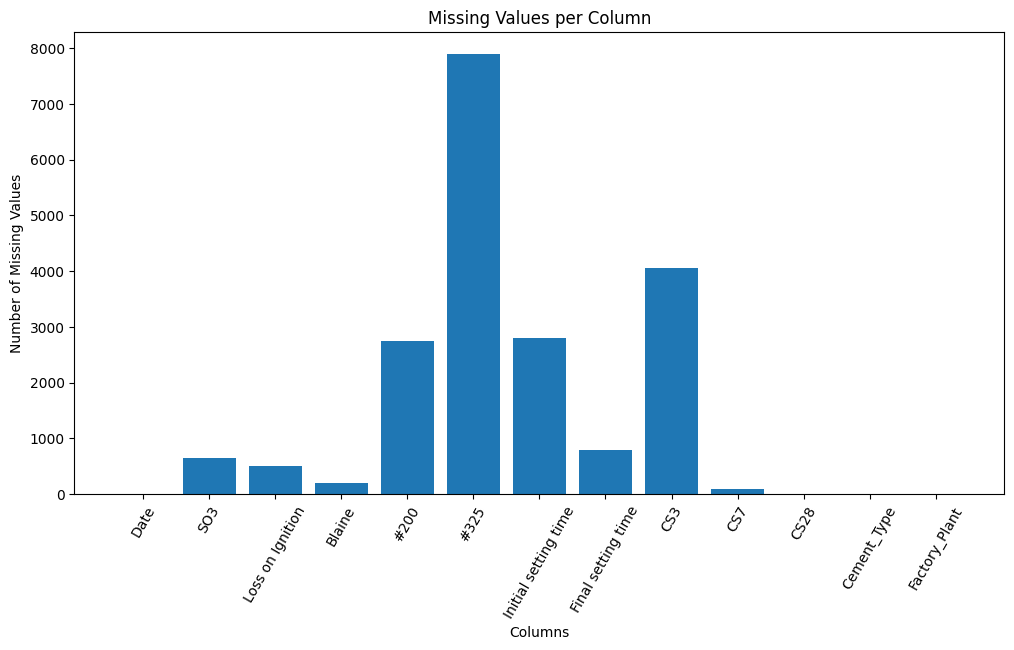

<IPython.core.display.Javascript object>

In [12]:
missing_counts = df.isnull().sum()
plt.figure(figsize=(12, 6))
plt.bar(missing_counts.index, missing_counts.values)
plt.xticks(rotation=60)
plt.xlabel("Columns")
plt.ylabel("Number of Missing Values")
plt.title("Missing Values per Column")
plt.show()

### Removing features with many zeros when applicable

In [13]:
zero_values = {}
for col in df.select_dtypes(include="number").columns:
    zero_percentages = (df[df[col].eq(0)].shape[0] / df.shape[0]) * 100
    zero_values[col] = zero_percentages

zero_percentages = pd.Series(zero_values, name=f"Zero (%) for Global Dataset")
zero_percentages = zero_percentages.sort_values(ascending=False)
zero_percentages = zero_percentages.to_frame(name=f"Zero (%) for Global Dataset")
zero_percentages.style.background_gradient(cmap="Reds")

,Zero (%) for Global Dataset
#200,14.136576
#325,0.348502
Loss on Ignition,0.101326
Blaine,0.093650
Initial setting time,0.084439
Final setting time,0.082903
SO3,0.062945
CS7,0.004606
CS3,0.000000
CS28,0.000000


<IPython.core.display.Javascript object>

### Drop rows where the target variable is null

In [14]:
df = df[df["CS28"].notna()]

<IPython.core.display.Javascript object>

### Dropping rows where the target variable is zero

In [15]:
df = df[~df["CS28"].eq(0)]

<IPython.core.display.Javascript object>

### Dropping rows where any other variable has a zero value - except #200

In [16]:
for col in df.columns:
    if col != "#200" and col != "#325":
        df = df[~df[col].eq(0)]

<IPython.core.display.Javascript object>

In [17]:
(df.isna().sum() / df.shape[0] * 100).sort_values(ascending=False).to_frame(
    name="Missing (%)"
).style.background_gradient(cmap="Reds")

,Missing (%)
#325,12.102411
CS3,6.225945
Initial setting time,4.307664
#200,4.158327
Final setting time,1.213166
SO3,0.997629
Loss on Ignition,0.726668
Blaine,0.307910
CS7,0.133941
Date,0.000000


<IPython.core.display.Javascript object>

<Axes: >

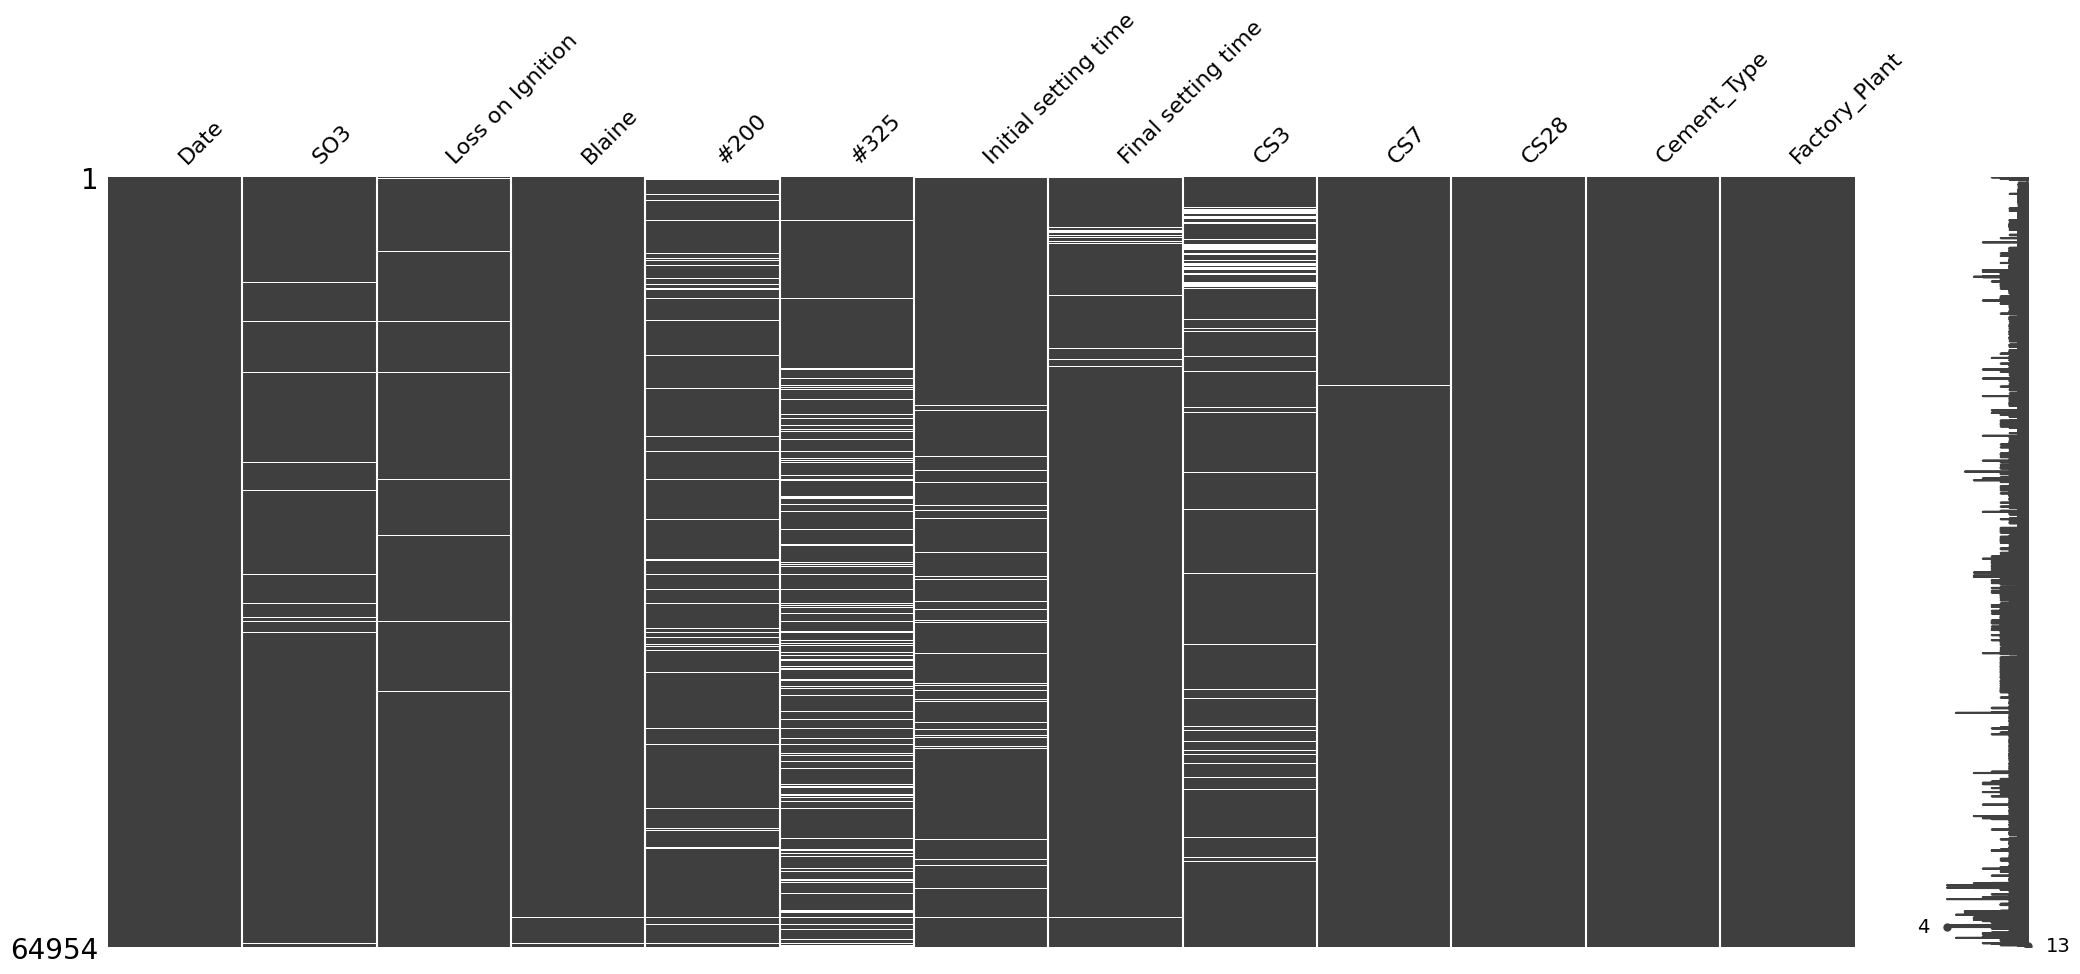

<IPython.core.display.Javascript object>

In [18]:
msno.matrix(df)

In [19]:
zero_values = {}
for col in df.select_dtypes(include="number").columns:
    zero_percentages = (df[df[col].eq(0)].shape[0] / df.shape[0]) * 100
    zero_values[col] = zero_percentages

zero_percentages = pd.Series(zero_values, name=f"Zero (%) for Global Dataset")
zero_percentages = zero_percentages.sort_values(ascending=False)
zero_percentages = zero_percentages.to_frame(name=f"Zero (%) for Global Dataset")
zero_percentages.style.background_gradient(cmap="Reds")

,Zero (%) for Global Dataset
#200,14.103827
#325,0.344859
SO3,0.000000
Loss on Ignition,0.000000
Blaine,0.000000
Initial setting time,0.000000
Final setting time,0.000000
CS3,0.000000
CS7,0.000000
CS28,0.000000


<IPython.core.display.Javascript object>

In [20]:
df.shape

(64954, 13)

<IPython.core.display.Javascript object>

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 64954 entries, 0 to 65135
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  64954 non-null  object 
 1   SO3                   64306 non-null  float64
 2   Loss on Ignition      64482 non-null  float64
 3   Blaine                64754 non-null  float64
 4   #200                  62253 non-null  float64
 5   #325                  57093 non-null  float64
 6   Initial setting time  62156 non-null  float64
 7   Final setting time    64166 non-null  float64
 8   CS3                   60910 non-null  float64
 9   CS7                   64867 non-null  float64
 10  CS28                  64954 non-null  float64
 11  Cement_Type           64954 non-null  object 
 12  Factory_Plant         64954 non-null  object 
dtypes: float64(10), object(3)
memory usage: 6.9+ MB


<IPython.core.display.Javascript object>

### Sort the dataset by date

In [22]:
df["Date"] = pd.to_datetime(df["Date"])

<IPython.core.display.Javascript object>

In [23]:
df = df.sort_values(by="Date")

<IPython.core.display.Javascript object>

## Saving the dataset

<h3>Saving for feature engineering</h3>

In [24]:
df.to_csv("../../../../data/interim/204/global_ay.csv", index=False)

<IPython.core.display.Javascript object>